In [224]:
from pystac_client import Client
import fsspec
import xarray as xr
import h5py
import pandas as pd

In [225]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [226]:
import seaborn as sns

In [227]:
token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJQXzJqUU50Y3QtOGR2cW1qVG5QWDVNc3BfT1Zid2lzVFlHbmFwM2tUWVdJIn0.eyJleHAiOjE3NDcyNDk2NjYsImlhdCI6MTc0NzIxMzY2NiwianRpIjoiMGNjMzdkNDAtZDM1YS00MmMzLWJlZWMtODVhNGRiNWY4YzBiIiwiaXNzIjoiaHR0cHM6Ly9pYW0ubWFhcC5lby5lc2EuaW50L3JlYWxtcy9lc2EtbWFhcCIsInN1YiI6IjhhYjZmMWMyLWUzYmUtNDAyNC04YTBlLTg2YWMxZmViOGI3ZiIsInR5cCI6IkJlYXJlciIsImF6cCI6ImJpby1wZGdzLXN5cy11c2VycyIsInNpZCI6IjYwMzk3YjQ1LTQ2MDYtNGYyOS1hYWM2LTIzYTVkYmIxYzcyMSIsInNjb3BlIjoib3BlbmlkIiwiZ3JvdXBzIjpbIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eCIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eElPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0F1eFJlc3QiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDAiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDBJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYUlPQyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWIiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDFiSU9DIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwxYyIsIi9jb2xsZWN0aW9ucy9CSU9NQVNTLVBER1MvQmlvbWFzc0xldmVsMWNJT0MiLCIvY29sbGVjdGlvbnMvQklPTUFTUy1QREdTL0Jpb21hc3NMZXZlbDJhIiwiL2NvbGxlY3Rpb25zL0JJT01BU1MtUERHUy9CaW9tYXNzTGV2ZWwyYUlPQyIsIi9leHBsb3JlciJdfQ.ZqKwa0cMB6lqslOIZ741HItTdNaoXjcVG9FnmfozKX-Yvw2zafoXufEIxBPIK9vm1s33LHQQjuSqBPC6hr2n07cf2kImxh8ZHLujuJHMafpUDgtqApYrHa9bQqlCF7-XT4N_Qlp7IfUAN5--JLVHVuFS0uzPfcjHAWljRj69iX0AJOIfOD7KR5KTo_GPB3ctFvGNgb1qfI5T_cS0EUDjzD5iudJMO8pNGTDfHm-RwB_hPM5iVbk312drjA4k866F1GxqOtBXXqXyuTjhfxiwv-AaaZxdCGLBW2y8U6Ttea1bBKYZ3R9XvNGHQJsq2EWW-ZUCROt9umASZeoOTelXtg'

#### Navigate the catalog and filter

In [228]:
catalog_url = 'https://catalog.maap.eo.esa.int/catalogue/'
catalog = Client.open(catalog_url)

In [127]:
search = catalog.search(
    collections=["EarthCAREL2InstChecked_MAAP"], # Currently MAAP has access to this L2 collection 

    #filter="productType = 'MSI_COP_2A'", # Filter by product type
    filter="productType = 'MSI_COP_2A' and frame = 'E'",

    datetime=['2025-04-01T00:00:00.000Z', '2025-04-30T23:59:00.000Z'], # filter by temporal extent 
    
    bbox = [0, -20, 10, -10], # combine multiple bbox by OR 
    # bounding box is defined by the bottom left corner (longmin latmin) and the top right corner coordinates (longmax latmax) 

    max_items=10  # Adjust as needed
)

items = list(search.items())
results = dict() # or just {} 
id_lst = []
href_lst = []
for item in items:
    id_lst.append(item.id)
    href_lst.append(item.assets["enclosure_1"].href)

for i, j in zip(id_lst, href_lst):
    results.update({i: j})


In [128]:
print(len(items))

10


In [146]:
fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})
href = href_lst[1]

with fs.open(href, "rb") as f:
    with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
        ds.load()


In [147]:
ds

<xarray.Dataset> Size: 297MB
Dimensions:                        (along_track: 11904, across_track: 384)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track) datetime64[ns] 95kB 2025-04-...
    latitude                       (along_track, across_track) float64 37MB n...
    longitude                      (along_track, across_track) float64 37MB n...
    geoid_offset                   (along_track) float32 48kB 4.0 ... 9.969e+36
    missing_lines_before_flag      (along_track) int8 12kB 0 0 0 0 0 ... 0 0 0 0
    quality_status                 (along_track, across_track) int8 5MB 3 ... 3
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 18MB n...
    cloud_top_temperature          (along_track, across_track) float32 18MB n...
    cloud_top_height               (along_track, across_track) float32 18MB n...
    cloud_top_pressure_error       (along_track, across_track) float32 18MB n...
    cloud_top_temperature_error    (along_track, across_track) float32 18MB n...
    cloud_top_height_error         (along_track, across_track) float32 18MB n...

In [148]:
def crop_to_stcu_region(ds):
    lon_min, lat_min, lon_max, lat_max = (0, -20, 10, -10)
    ds0 = ds.where((ds.longitude >= lon_min) & (ds.longitude <= lon_max) 
                   & (ds.latitude >= lat_min) & (ds.latitude <= lat_max), drop=True)
    return ds0

In [149]:
ds0 = crop_to_stcu_region(ds)

In [150]:
ds0

<xarray.Dataset> Size: 76MB
Dimensions:                        (along_track: 2522, across_track: 357)
Dimensions without coordinates: along_track, across_track
Data variables: (12/18)
    time                           (along_track, across_track) datetime64[ns] 7MB ...
    latitude                       (along_track, across_track) float64 7MB -1...
    longitude                      (along_track, across_track) float64 7MB 9....
    geoid_offset                   (along_track, across_track) float32 4MB 9....
    missing_lines_before_flag      (along_track, across_track) float32 4MB 0....
    quality_status                 (along_track, across_track) float32 4MB 0....
    ...                             ...
    cloud_top_pressure             (along_track, across_track) float32 4MB 7....
    cloud_top_temperature          (along_track, across_track) float32 4MB 28...
    cloud_top_height               (along_track, across_track) float32 4MB 3....
    cloud_top_pressure_error       (along_track, across_track) float32 4MB na...
    cloud_top_temperature_error    (along_track, across_track) float32 4MB 1....
    cloud_top_height_error         (along_track, across_track) float32 4MB na...

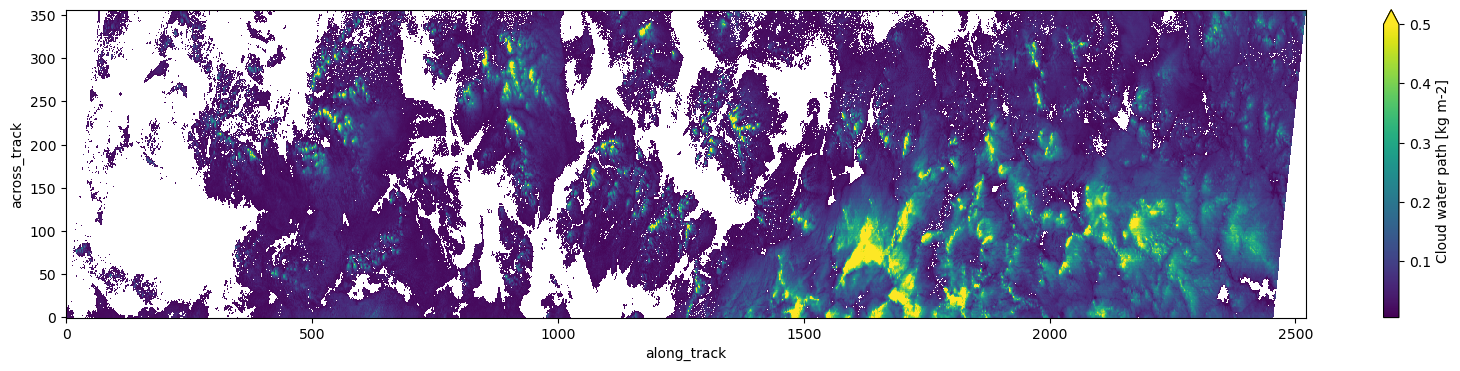

In [151]:
ds0.cloud_water_path.T.plot(vmax=0.5, figsize=(20,4))

## LWP distribution

In [204]:
def get_cloud_mask(ds0):
    valid_mask = ~np.isnan(ds0.latitude)
    cld_mask = xr.where(ds0.cloud_water_path > 1e-2, 1, 0).where(valid_mask)
    return cld_mask

In [205]:
def compute_lwp_distr_parameters(lwp, save_plot=None):
    lwp = lwp.where(lwp > 1e-2)  # following the StCu group
    lwp_clean = lwp.where(np.isfinite(lwp))

    if save_plot is not None:
        sns.histplot(lwp_clean.values.flatten(), log_scale=True)
        plt.show()
        plt.savefig(save_plot)

    # compute mean and std
    lwp_mean = float(lwp_clean.mean().values)
    lwp_std = float(lwp_clean.std().values)
    
    # compute nondimensional homogeneity parameter
    homog_param = ((lwp_mean / lwp_std)**2)
    
    # Calculate the skewness 
    lwp_skew = scipy.stats.skew(lwp_clean.values.flatten(), bias=False, nan_policy='omit')
    
    # Calculate the kurtosis 
    lwp_curtosis = scipy.stats.kurtosis(lwp_clean.values.flatten(), nan_policy='omit')

    return lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis

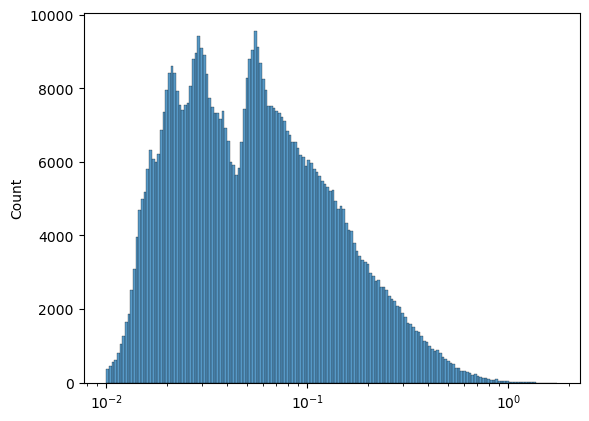

(0.08400016278028488,
 0.09489471465349197,
 0.7835671254481285,
 np.float64(3.2861857414245605),
 np.float32(17.29871))

<Figure size 640x480 with 0 Axes>

In [160]:
compute_lwp_distr_parameters(lwp=ds0.cloud_water_path, save_plot='tmp.png')

## Power spectrum

In [42]:
da = ds0.cloud_water_path
da_clean = da.where(np.isfinite(da))
image = np.where(np.isnan(da_clean.values), 0, da_clean.values)
image = np.where(np.isnan(da_clean.values), 0, 1)
F = np.fft.fft2(image)
F_shifted = np.fft.fftshift(F)
power_spectrum = np.abs(F_shifted)**2

In [43]:
nx, ny = image.shape
kx = np.fft.fftfreq(nx) * nx
ky = np.fft.fftfreq(ny) * ny
kx_shifted = np.fft.fftshift(kx)
ky_shifted = np.fft.fftshift(ky)
KX, KY = np.meshgrid(kx_shifted, ky_shifted, indexing='ij')
wavenumber = np.sqrt(KX**2 + KY**2)

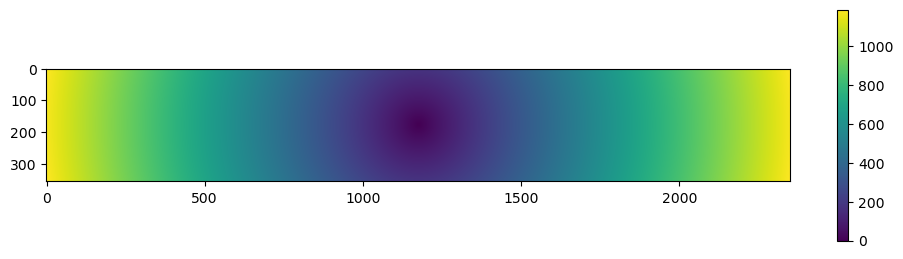

In [44]:
plt.figure(figsize=(12,3))
plt.imshow(wavenumber.T)
plt.colorbar()

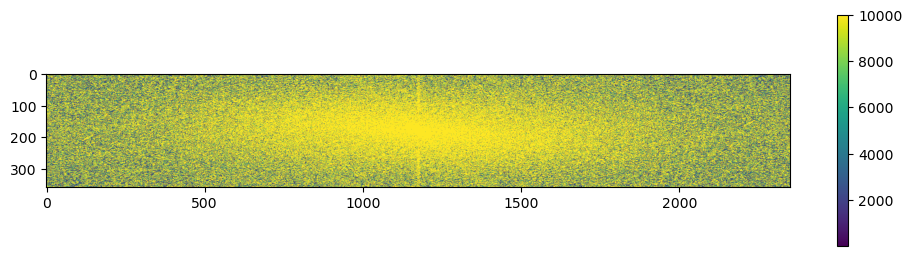

In [45]:
plt.figure(figsize=(12,3))
plt.imshow(power_spectrum.T, vmax=1e4)
plt.colorbar()

In [48]:
wavenumber_flat = wavenumber.ravel()
power_flat = power_spectrum.ravel()

# Define bins for wavenumber
bins = np.linspace(0, wavenumber_flat.max(), num=1000)
bin_indices = np.digitize(wavenumber_flat, bins)

power_binned = np.array([power_flat[bin_indices == i].mean() for i in range(1, len(bins))])
bin_centers = (bins[:-1] + bins[1:]) / 2

In [49]:
probability_distribution = power_binned / power_binned.sum()

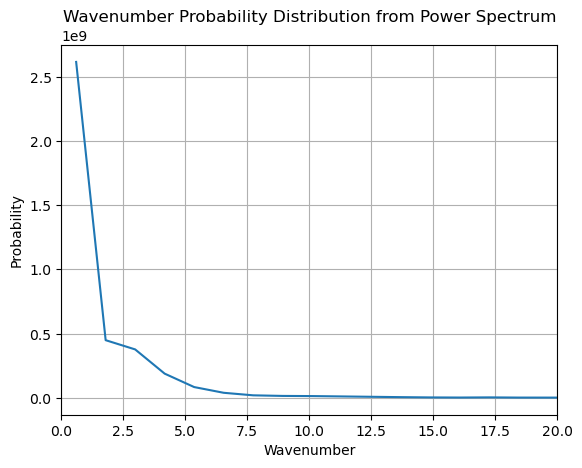

In [50]:
plt.plot(bin_centers, power_binned)
ax = plt.gca()
ax.set_xlim([0,20])
plt.xlabel('Wavenumber')
plt.ylabel('Probability')
plt.title('Wavenumber Probability Distribution from Power Spectrum')
plt.grid(True)
plt.show()


In [120]:
2*np.pi / 1/0.5

12.566370614359172

In [51]:
da_ps = xr.DataArray(data=power_flat, dims='k2', coords={'wavenumber': ('k2', wavenumber_flat)})
da_ps = da_ps.sortby('wavenumber')

In [52]:
da_ps

<xarray.DataArray (k2: 839307)> Size: 7MB
array([7.66605314e+09, 2.54699165e+09, 1.57024745e+08, ...,
       3.27938524e+03, 3.27938524e+03, 1.52115759e+03], shape=(839307,))
Coordinates:
    wavenumber  (k2) float64 7MB 0.0 1.0 1.0 ... 1.188e+03 1.188e+03 1.188e+03
Dimensions without coordinates: k2

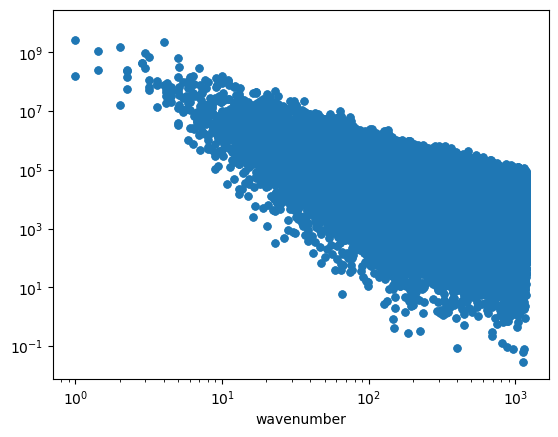

In [53]:
da_ps.plot.scatter(xscale='log', yscale='log', lw=0)#, ylim=(-1e6,5e8))

## LvL

In [117]:
import numpy as np
from scipy.stats import ks_2samp
from PIL import Image
from scipy.ndimage import label
import cv2

def LvL(cloud_mask):
    # Convert cloud_mask to double
    cloud_mask = cloud_mask.astype(float)
    sz = cloud_mask.shape
    mnsz = min(sz)  # minimum scale of the field
    #sz_cloud_mask = sz[0] * sz[1]
    sz_cloud_mask = cloud_mask.count().values
    #p = np.sum(cloud_mask) / sz_cloud_mask  # cloud fraction
    p = cloud_mask.mean().values

    # estimating the ideal length to capture almost 100% of the histogram
    # we want that the error < exp(-12) for the perfect rand case
    mxln = int(np.floor(abs(12 / np.log(p))) + 1)
    mxln = min(mxln, mnsz)

    # The cloud part
    # Flatenning along the two directions
    # then we need to divide c1 and c2 by two

    B = cloud_mask.values.flatten()  # rows
    C = cloud_mask.values.flatten(order='F') #columns 
    B = np.concatenate((C, B))

    L, num_labels = label(B)
    # Label connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(L.astype(np.uint8))

    # Extract area of each connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    # Adding one to the max area
    mx_ar = np.max(areas) + 1   

    # To avoid single histogram
    if mx_ar < mxln:
        mx_ar = mxln
    else:
        mxln = mx_ar

    # Get the cloud chord length counts - c1    
    c1, _ = np.histogram(areas, bins=np.arange(1, mx_ar + 2))
    # Correct for flattening in two directions
    c1 = c1 / 2
    s1 = np.sum(c1)

    # Now, the theortical calculations ct, nt for a given cloud fraction (p)
    nt1 = np.arange(1, mxln + 1)
    ct1 = (sz_cloud_mask * (1 - p) ** 2) * p ** nt1
    st1 = np.sum(ct1)
    nt1 = nt1.astype(int)


    # Get the KS score for the cloud part
    adf1 = np.abs(np.cumsum(ct1 / st1) - np.cumsum(c1 / s1))
    KS1 = np.max(adf1)


    # The void part
    q = 1 - p # void fraction
    mxln = int(np.floor(abs(12 / np.log(q))) + 1)
    mxln = min(mxln, mnsz)
    B = -B + 1

    L, num_labels = label(B)
    # Label connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(L.astype(np.uint8))

    # Extract area of each connected component
    areas = stats[1:, cv2.CC_STAT_AREA]
    # Adding one to the max area
    mx_ar = np.max(areas) + 1   

    if mx_ar < mxln:
        mx_ar = mxln
    else:
        mxln = mx_ar

    c2, _ = np.histogram(areas, bins=np.arange(1, mx_ar + 2))
    c2 = c2 / 2
    s2 = np.sum(c2)

    nt2 = np.arange(1, mxln + 1)
    ct2 = (sz_cloud_mask * (1 - q) ** 2) * q ** nt2
    st2 = np.sum(ct2)
    nt2 = nt2.astype(int)

    # Get the KS score for the void part
    adf2 = np.abs(np.cumsum(ct2 / st2) - np.cumsum(c2 / s2))
    KS2 = np.max(adf2)

    return KS1, KS2

In [118]:
valid_mask = ~np.isnan(ds0.latitude)
cld_mask = xr.where(ds0.cloud_water_path > 1e-2, 1, 0).where(valid_mask)

In [119]:
LvL(cld_mask)

(np.float64(0.5920040041072384), np.float64(0.19457381619704928))

# Loop through month

In [236]:
search = catalog.search(
    collections=["EarthCAREL2InstChecked_MAAP"], # Currently MAAP has access to this L2 collection 

    #filter="productType = 'MSI_COP_2A'", # Filter by product type
    filter="productType = 'MSI_COP_2A' and frame = 'E'",

    #datetime=['2025-04-01T00:00:00.000Z', '2025-04-30T23:59:00.000Z'], # filter by temporal extent 
    
    bbox = [0, -20, 10, -10], # combine multiple bbox by OR 
    # bounding box is defined by the bottom left corner (longmin latmin) and the top right corner coordinates (longmax latmax) 
    method='GET',
    max_items=100  # Adjust as needed
)

items = list(search.items())
results = dict() # or just {} 
id_lst = []
href_lst = []

for item in items:
    try: 
        id_lst.append(item.id)
        href_lst.append(item.assets["enclosure_1"].href)
    except KeyError:
        print('error in item ', item)

for i, j in zip(id_lst, href_lst):
    results.update({i: j})


In [237]:
len(href_lst)

16

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/03/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E.h5>


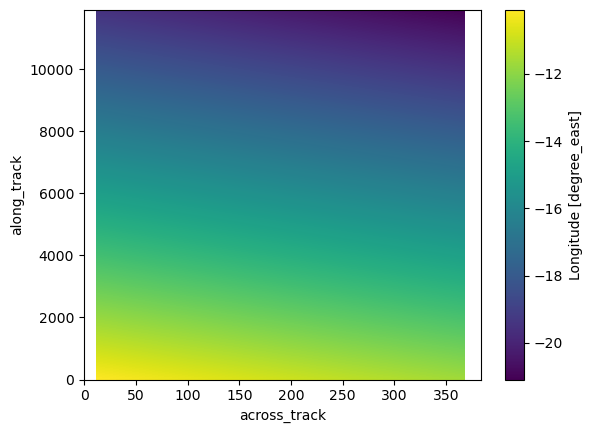

no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/05/ECA_EXAB_MSI_COP_2A_20250405T131207Z_20250405T144641Z_04848E/ECA_EXAB_MSI_COP_2A_20250405T131207Z_20250405T144641Z_04848E/ECA_EXAB_MSI_COP_2A_20250405T131207Z_20250405T144641Z_04848E.h5>


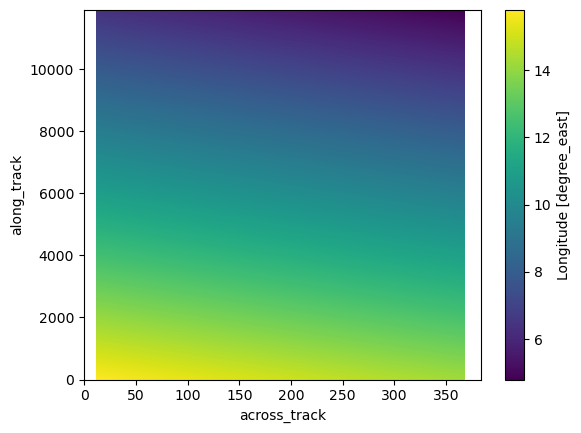

... computing LWP distribution measures
... computing LvL measures


/tmp/ipykernel_203/353994895.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, df_orbit])


<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/08/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E/ECA_EXAB_MSI_COP_2A_20250408T134126Z_20250408T151420Z_04895E.h5>


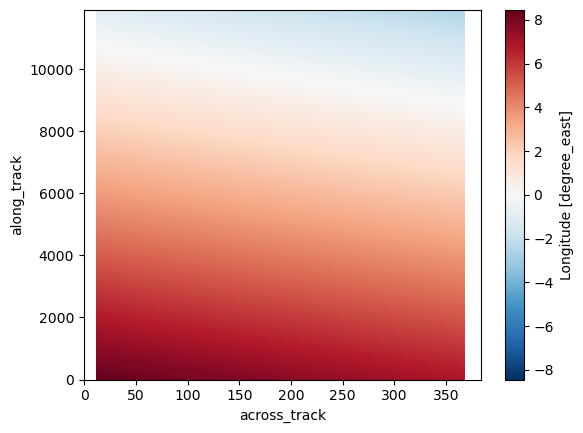

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/12/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E/ECA_EXAB_MSI_COP_2A_20250412T145155Z_20250412T162224Z_04958E.h5>


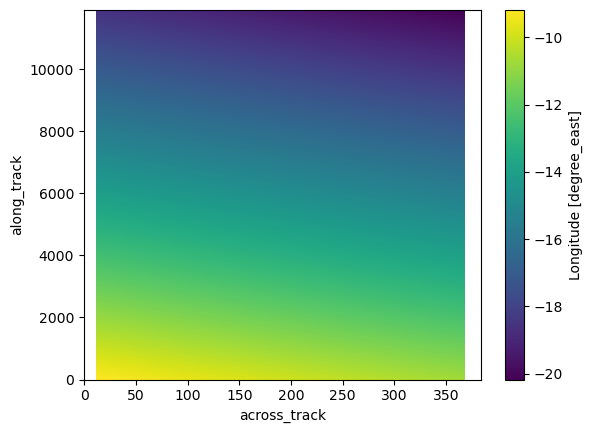

no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/30/ECA_EXAB_MSI_COP_2A_20250430T144419Z_20250430T161809Z_05238E/ECA_EXAB_MSI_COP_2A_20250430T144419Z_20250430T161809Z_05238E/ECA_EXAB_MSI_COP_2A_20250430T144419Z_20250430T161809Z_05238E.h5>


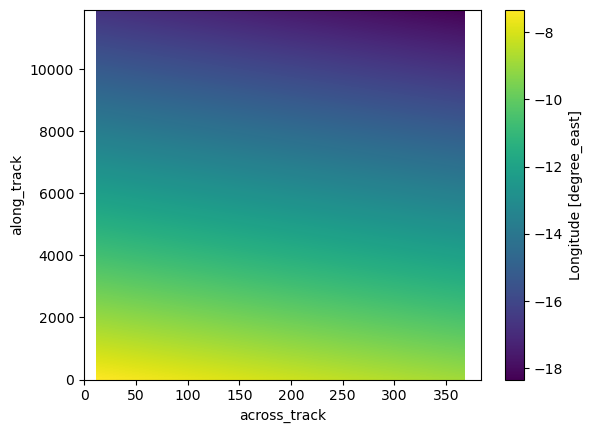

no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/01/ECA_EXAB_MSI_COP_2A_20250401T133403Z_20250401T150732Z_04786E/ECA_EXAB_MSI_COP_2A_20250401T133403Z_20250401T150732Z_04786E/ECA_EXAB_MSI_COP_2A_20250401T133403Z_20250401T150732Z_04786E.h5>


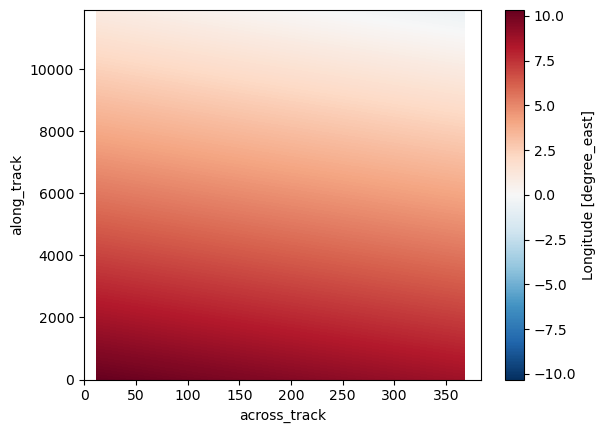

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/03/ECA_EXAB_MSI_COP_2A_20250403T132309Z_20250403T163014Z_04817E/ECA_EXAB_MSI_COP_2A_20250403T132309Z_20250403T163014Z_04817E/ECA_EXAB_MSI_COP_2A_20250403T132309Z_20250403T163014Z_04817E.h5>


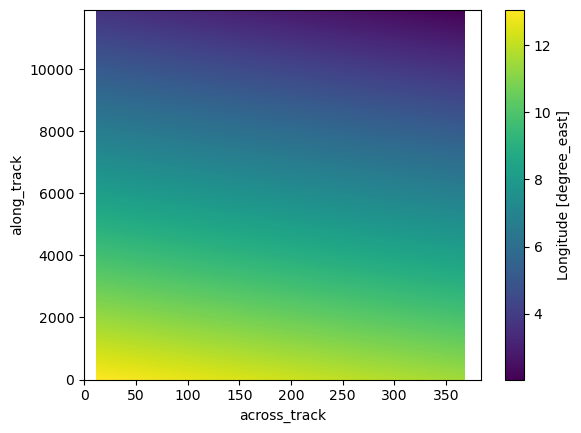

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/14/ECA_EXAB_MSI_COP_2A_20250414T130805Z_20250414T144115Z_04988E/ECA_EXAB_MSI_COP_2A_20250414T130805Z_20250414T144115Z_04988E/ECA_EXAB_MSI_COP_2A_20250414T130805Z_20250414T144115Z_04988E.h5>


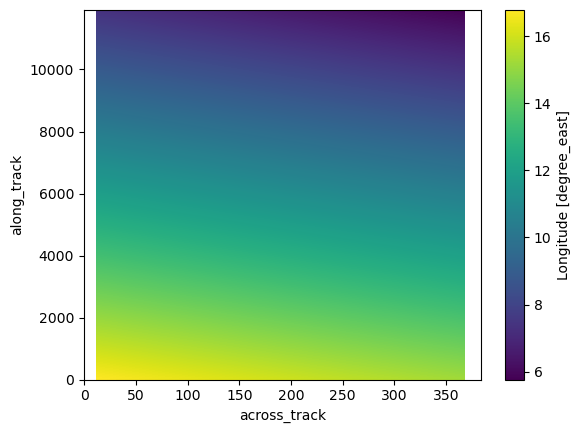

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/01/ECA_EXAB_MSI_COP_2A_20250401T150635Z_20250401T211954Z_04787E/ECA_EXAB_MSI_COP_2A_20250401T150635Z_20250401T211954Z_04787E/ECA_EXAB_MSI_COP_2A_20250401T150635Z_20250401T211954Z_04787E.h5>


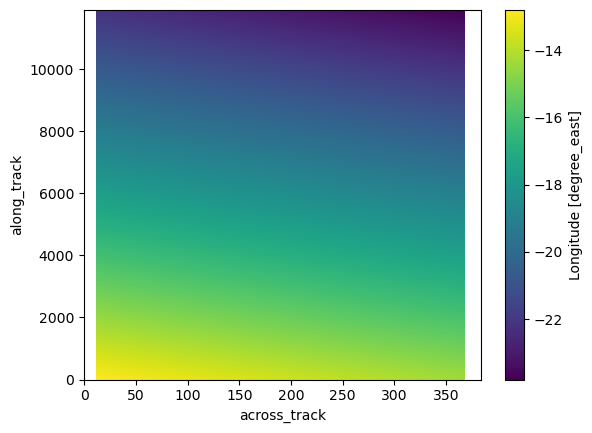

no data in cropped dataset...continuing

<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/12/ECA_EXAB_MSI_COP_2A_20250412T131922Z_20250412T145219Z_04957E/ECA_EXAB_MSI_COP_2A_20250412T131922Z_20250412T145219Z_04957E/ECA_EXAB_MSI_COP_2A_20250412T131922Z_20250412T145219Z_04957E.h5>


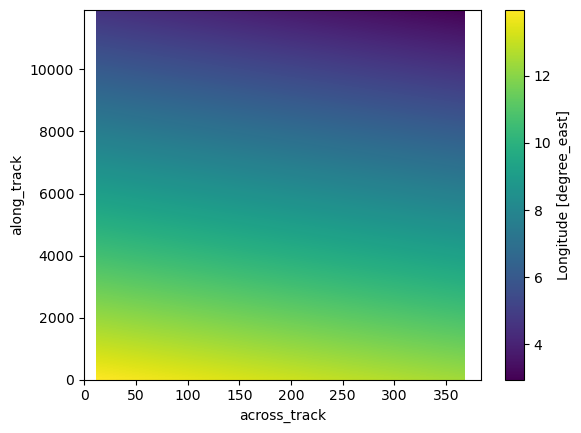

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/21/ECA_EXAB_MSI_COP_2A_20250421T131534Z_20250421T145415Z_05097E/ECA_EXAB_MSI_COP_2A_20250421T131534Z_20250421T145415Z_05097E/ECA_EXAB_MSI_COP_2A_20250421T131534Z_20250421T145415Z_05097E.h5>


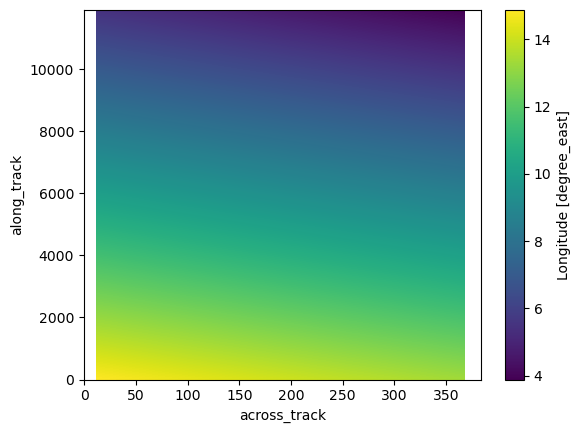

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/24/ECA_EXAB_MSI_COP_2A_20250424T134515Z_20250424T165228Z_05144E/ECA_EXAB_MSI_COP_2A_20250424T134515Z_20250424T165228Z_05144E/ECA_EXAB_MSI_COP_2A_20250424T134515Z_20250424T165228Z_05144E.h5>


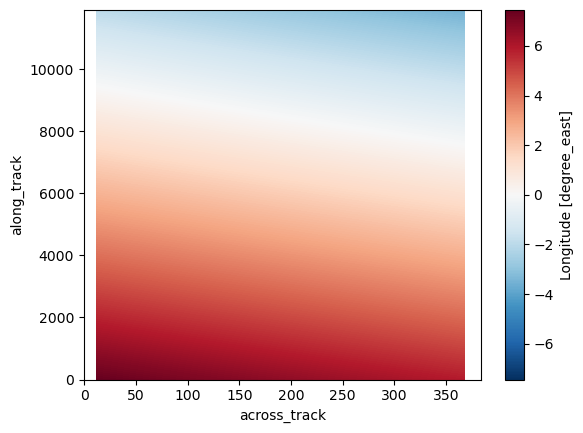

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/10/ECA_EXAB_MSI_COP_2A_20250410T133028Z_20250410T150336Z_04926E/ECA_EXAB_MSI_COP_2A_20250410T133028Z_20250410T150336Z_04926E/ECA_EXAB_MSI_COP_2A_20250410T133028Z_20250410T150336Z_04926E.h5>


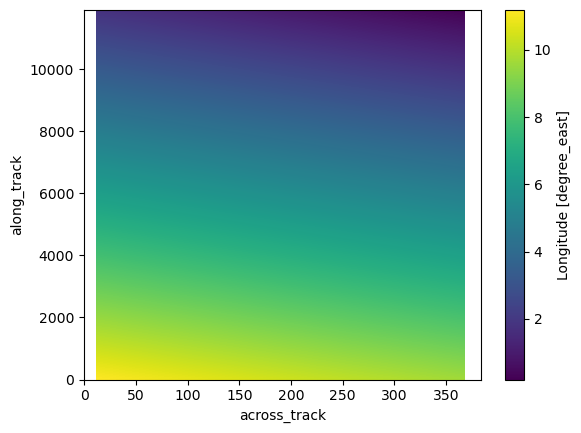

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/17/ECA_EXAB_MSI_COP_2A_20250417T133744Z_20250417T151204Z_05035E/ECA_EXAB_MSI_COP_2A_20250417T133744Z_20250417T151204Z_05035E/ECA_EXAB_MSI_COP_2A_20250417T133744Z_20250417T151204Z_05035E.h5>


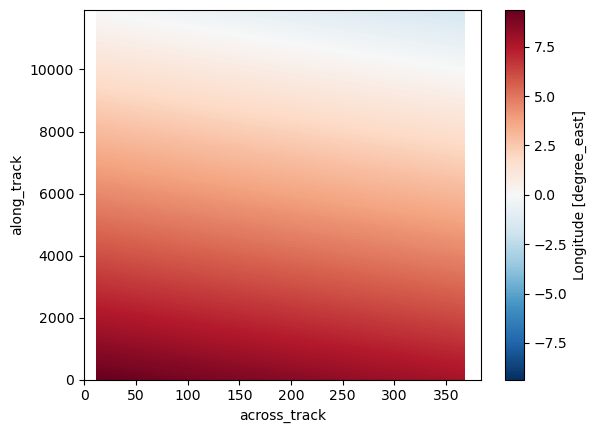

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/19/ECA_EXAB_MSI_COP_2A_20250419T132644Z_20250419T145948Z_05066E/ECA_EXAB_MSI_COP_2A_20250419T132644Z_20250419T145948Z_05066E/ECA_EXAB_MSI_COP_2A_20250419T132644Z_20250419T145948Z_05066E.h5>


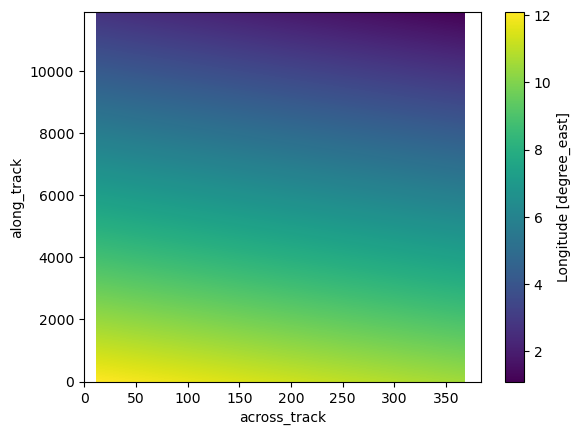

... computing LWP distribution measures
... computing LvL measures
<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/28/ECA_EXAB_MSI_COP_2A_20250428T132258Z_20250428T163144Z_05206E/ECA_EXAB_MSI_COP_2A_20250428T132258Z_20250428T163144Z_05206E/ECA_EXAB_MSI_COP_2A_20250428T132258Z_20250428T163144Z_05206E.h5>


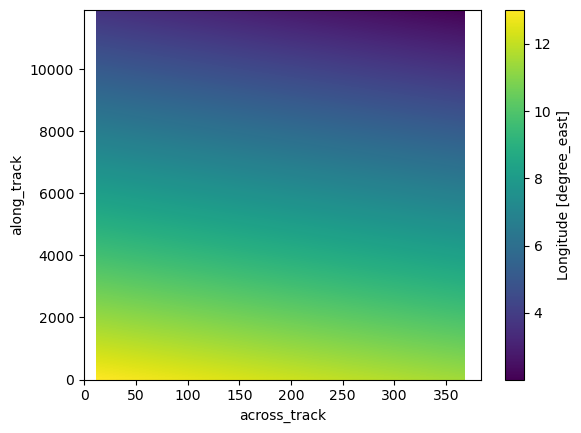

... computing LWP distribution measures
... computing LvL measures


In [241]:
fs = fsspec.filesystem("https", headers={"Authorization": f"Bearer {token}"})

columns = ['orbit', 'date_time', 'cloud_cover', 'lwp_mean', 'lwp_std', 'homog_param', 'lwp_skew', 'lwp_curtosis', 'LvL_KS1', 'LvL_KS2']

df_results = pd.DataFrame(columns = columns)

for href in href_lst:
    orbit = href[-9:-3]
    date_time = href[-43:-27]
    with fs.open(href, "rb") as f:
        print(f)
        with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
            ds = ds[['latitude','longitude','cloud_water_path']].compute()
            ds.longitude.plot()
            plt.show()
                
            if len(ds.along_track) == 0:
                print('no data in dataset...continuing\n')
                continue
                
            ds0 = crop_to_stcu_region(ds)
    
    if len(ds0.along_track) == 0:
        print('no data in cropped dataset...continuing\n')
        continue
        
    print('... computing LWP distribution measures')
    cloud_mask = get_cloud_mask(ds0)
    cloud_cover = cloud_mask.mean().values
    lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis = compute_lwp_distr_parameters(lwp=ds0.cloud_water_path)
    
    print('... computing LvL measures')
    KS1, KS2 = LvL(cloud_mask)

    df_orbit = pd.DataFrame([[orbit, date_time, cloud_cover, lwp_mean, lwp_std, homog_param, lwp_skew, lwp_curtosis, KS1, KS2]], columns = columns)

    df_results = pd.concat([df_results, df_orbit])
        

In [239]:
df_results

,orbit,date_time,cloud_cover,lwp_mean,lwp_std,homog_param,lwp_skew,lwp_curtosis,LvL_KS1,LvL_KS2
0,04848E,20250405T131207Z,0.7492114266418582,0.084000,0.094895,0.783567,3.286186,17.298710,0.384089,0.559125
0,04895E,20250408T134126Z,0.19478135692144605,0.044043,0.050714,0.754240,4.520014,31.780281,0.592004,0.194574
0,04786E,20250401T133403Z,0.7154342431761787,0.084479,0.086968,0.943576,2.989427,15.084003,0.166344,0.522267
0,04817E,20250403T132309Z,0.709653979791343,0.067268,0.058401,1.326713,3.657519,29.745697,0.400734,0.543125
0,04988E,20250414T130805Z,0.3899228647048525,0.032250,0.022606,2.035160,1.904809,5.628466,0.375860,0.262585
0,04957E,20250412T131922Z,0.4569336970248709,0.058392,0.086185,0.459035,6.754057,74.050201,0.390563,0.434093
0,05097E,20250421T131534Z,0.7735896628516146,0.057930,0.050501,1.315871,3.649115,30.051079,0.301348,0.528057
0,05144E,20250424T134515Z,0.5955811138014527,0.063780,0.085531,0.556061,7.847559,99.600822,0.334726,0.553089
0,04926E,20250410T133028Z,0.23554742843584378,0.085148,0.156270,0.296896,6.223590,57.615013,0.492031,0.349480
0,05035E,20250417T133744Z,0.7043405204385934,0.058891,0.053900,1.193747,3.807639,25.622368,0.398091,0.562426


<File-like object HTTPFileSystem, https://catalog.maap.eo.esa.int/data/earthcare-pdgs-01/EarthCARE/MSI_COP_2A/AB/2025/04/03/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E/ECA_EXAB_MSI_COP_2A_20250403T145542Z_20250403T163013Z_04818E.h5>


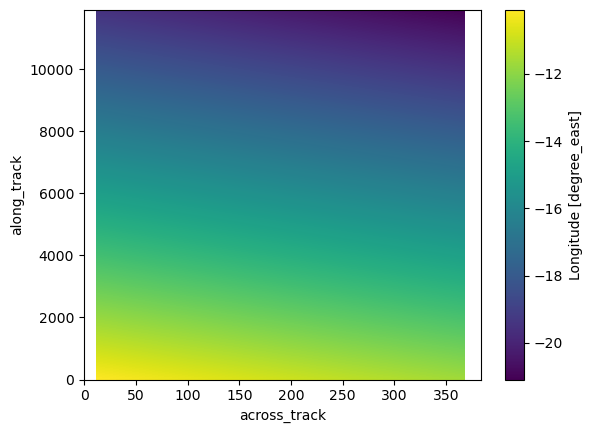

In [243]:
href = href_lst[0]
orbit = href[-9:-3]
date_time = href[-43:-27]
with fs.open(href, "rb") as f:
    print(f)
    with xr.open_dataset(f, engine="h5netcdf", group="ScienceData") as ds:
        ds = ds[['latitude','longitude','cloud_water_path']].compute()
        ds.longitude.plot()
        plt.show()
            
        if len(ds.along_track) == 0:
            print('no data in dataset...continuing\n')
            
        ds0 = crop_to_stcu_region(ds)

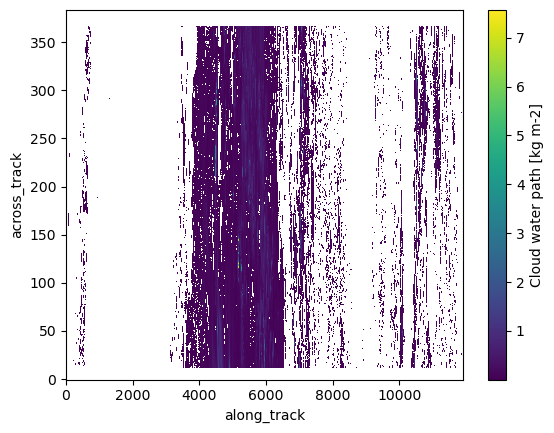

In [245]:
ds.cloud_water_path.T.plot()

In [248]:
ds.longitude.max()

<xarray.DataArray 'longitude' ()> Size: 8B
array(-10.09677124)

In [249]:
ds.longitude.min()

<xarray.DataArray 'longitude' ()> Size: 8B
array(-21.09182739)